<a href="https://colab.research.google.com/github/imbuoyp/Python-Data/blob/main/Logistic_Regression_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error, accuracy_score

In [5]:
#load datasets

In [6]:
diabetes = datasets.load_diabetes()
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [7]:
# 위에 항목은 피쳐, 밑에 항목(target)은 정답

In [10]:
diabetes_target = diabetes.target
diabetes_train = diabetes.data
#1년뒤 당노병환자의 병 진척 척도 
#평균 지점을 두고 평균 이상은 양성, 미만은 음성으로 판단할 것 target data에서 평균값을 구할것

In [11]:
diabetes_train
#어레이 한줄당 한 환자의 피쳐들
#구하려고하는 건 타겟의 평균

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [ ]:
#3.create binary labels

In [13]:
mean_measurement = np.mean(diabetes_target)
print(mean_measurement)

152.13348416289594


In [16]:
#큰지 작은지 물어야함.t/f
diabetes_target_zero_one = np.array(diabetes_target > mean_measurement, dtype=int)
diabetes_target_zero_one
#정답값이 mean보다 큰가? 맞으면 t 음성 f
#t /f를 정수형으로 바꿀때 np.array, dtype=int를 넣는다
#새로운 정답값으로 사용할 것임.

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
#4.feature selection

In [73]:
#어떤 정답값을 갖을지 찾는것
diabetes_x = diabetes_train[:,2:7]
#콤마기준으로 행 오른쪽은 열
#행은 데이터셋 전체 442개의 행이 있는데 전체 다
#뒤에 : 는 가져오고 싶은것 
diabetes_x

array([[ 0.06169621,  0.02187235, -0.0442235 , -0.03482076, -0.04340085],
       [-0.05147406, -0.02632783, -0.00844872, -0.01916334,  0.07441156],
       [ 0.04445121, -0.00567061, -0.04559945, -0.03419447, -0.03235593],
       ...,
       [-0.01590626,  0.01728186, -0.03734373, -0.01383982, -0.02499266],
       [ 0.03906215,  0.00121513,  0.01631843,  0.01528299, -0.02867429],
       [-0.0730303 , -0.08141377,  0.08374012,  0.02780893,  0.17381578]])

In [20]:
#print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [23]:
diabetes_y = diabetes_target_zero_one
diabetes_y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [24]:
#train_set, test_set 나눈다
#5.split into train & test

In [37]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_x, diabetes_y, test_size=0.3, random_state=42)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)
print(y_test.shape)

(309, 1)
(133,)
(309,)
(133,)


In [38]:
#6.create model object=붕어빵틀
model = linear_model.LogisticRegression(n_jobs=-1)
model
#njob는 코어 몇 개 사용할거냐 디폴트 값이 -1이다  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#7.train model object
model.fit(x_train, y_train)
#n2는 절대값으로
#n1은 스퀘어 값으로 그게 페널티
#랜덤으로 바꾸는것
#멀티클랙스: 멀티값쓸때 1vsratio

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
#test model object
model.predict(x_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [61]:
pred_test = model.predict_proba(x_test)

In [63]:
ac_score =  accuracy_score(model.predict(x_test), y_test)
print("Accuracy: {0: 5f}".format(ac_score))

Accuracy:  0.571429


In [66]:
#9.visualization

#roc, auc 계산하는게 sklearn에 있음 
from sklearn.metrics import roc_curve, auc

In [70]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test[:,1])
roc_auc = auc(fpr, tpr)
#y_true 뒤에는 정답, y_score는 확률 proba
#y_score행으로 전체 데이터, 양성 1일 확률을 넣어줌 

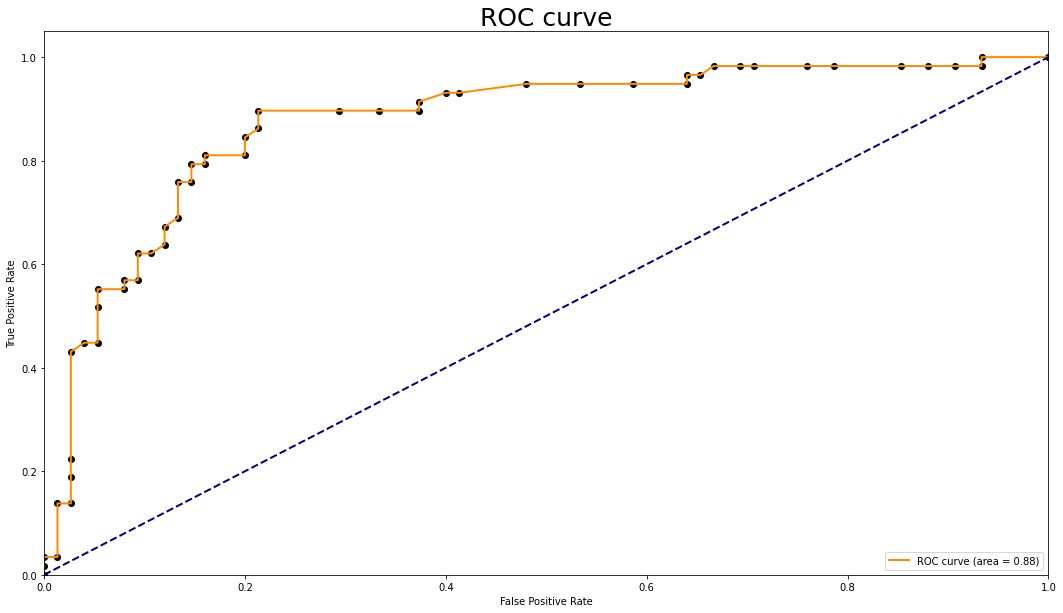

In [72]:
plt.figure(figsize=(18, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC curve (area = %.2f)"%roc_auc)
plt.scatter(fpr, tpr, color='black')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve", size=25)
plt.legend(loc='lower right')
plt.show()

In [ ]:
#10. searching for proper features

In [74]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [78]:
from itertools import combinations, permutations

In [89]:
possible_comb = []
total_feature_length = range(len(diabetes.feature_names))
#1, 10, 1, 9, 이렇게 포루프
for i in total_feature_length:
  possible_comb.append(list(combinations(total_feature_length, i)))

In [94]:
flat_possible_comb = [item for sublist in possible_comb for item in sublist if item is not ()]
# 1.item for sublist in possible_comb for item in sublist
#2.if item is not ()
#smaple = []
#for sublist in possible_comb:
#    for item in sublist:
#      if item != ():
#        smaple.append(item)

In [86]:
#list(combinations(total_feature_length, 2))
#123집합데이터를 2개쌍씩 돌려줘

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [95]:
len(flat_possible_comb)

1022

In [100]:
pip install tqdm

In [108]:
from tqdm import tqdm

score_dict = {}
for comb in flat_possible_comb:
    diabetes_x = diabetes_train[:,comb] 
    diabetes_y = diabetes_target_zero_one
    
    x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_x, diabetes_y, test_size=0.3, random_state=42)
    model = linear_model.LogisticRegression(n_jobs=-1, multi_class='ovr')
    model.fit(x_train, y_train)
    model.predict(x_test)
    pred_test = model.predict_proba(x_test)
    ac_score =  accuracy_score(model.predict(x_test), y_test)
    score_dict[comb] = ac_score
    #딕셔너리에 키값넣는 방법
      #ovr 하나랑 여러개 비교하는, 

In [109]:
score_dict

{(0,): 0.5639097744360902,
 (1,): 0.5639097744360902,
 (2,): 0.5789473684210527,
 (3,): 0.5789473684210527,
 (4,): 0.5639097744360902,
 (5,): 0.5639097744360902,
 (6,): 0.5639097744360902,
 (7,): 0.5714285714285714,
 (8,): 0.5714285714285714,
 (9,): 0.5714285714285714,
 (0, 1): 0.5639097744360902,
 (0, 2): 0.5864661654135338,
 (0, 3): 0.5939849624060151,
 (0, 4): 0.5639097744360902,
 (0, 5): 0.5639097744360902,
 (0, 6): 0.5714285714285714,
 (0, 7): 0.5789473684210527,
 (0, 8): 0.5864661654135338,
 (0, 9): 0.5714285714285714,
 (1, 2): 0.5789473684210527,
 (1, 3): 0.5789473684210527,
 (1, 4): 0.5639097744360902,
 (1, 5): 0.5639097744360902,
 (1, 6): 0.5639097744360902,
 (1, 7): 0.5714285714285714,
 (1, 8): 0.5714285714285714,
 (1, 9): 0.5714285714285714,
 (2, 3): 0.6466165413533834,
 (2, 4): 0.5939849624060151,
 (2, 5): 0.5864661654135338,
 (2, 6): 0.5939849624060151,
 (2, 7): 0.6015037593984962,
 (2, 8): 0.6466165413533834,
 (2, 9): 0.6165413533834586,
 (3, 4): 0.5864661654135338,
 (3, 

In [110]:
max_score = sorted(score_dict.values(), reverse=True)[0]
max_score
# defalt 값 false

0.7443609022556391

In [114]:
for pair, a_score is score_dict.items():
  if ac_score == max_score:
    print('Score: ' , max_score, 'Pair: ', pair)
  #페어와 스코어 쌍으로 만들어준다 item으로 쓰니까
  #enumerate 인덱스와, 값을 튜플로묶어줌


SyntaxError: ignored